In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/thendralvanans/Thinkful-Project/main/Capstone%203/Clustering_Challenge_Wine_Data.csv" 
df = pd.read_csv(url)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
print(f'Missing values in data set: {df.isna().sum().sum()}')
print('')
print(f'Duplicates in data set: {df.duplicated().sum()}, ({np.round(100*df.duplicated().sum()/len(df),1)}%)')
print('')
print(f'data types: {df.dtypes.unique()}')

Missing values in data set: 0

Duplicates in data set: 0, (0.0%)

data types: [dtype('float64') dtype('int64')]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Data Analysis

<Axes: >

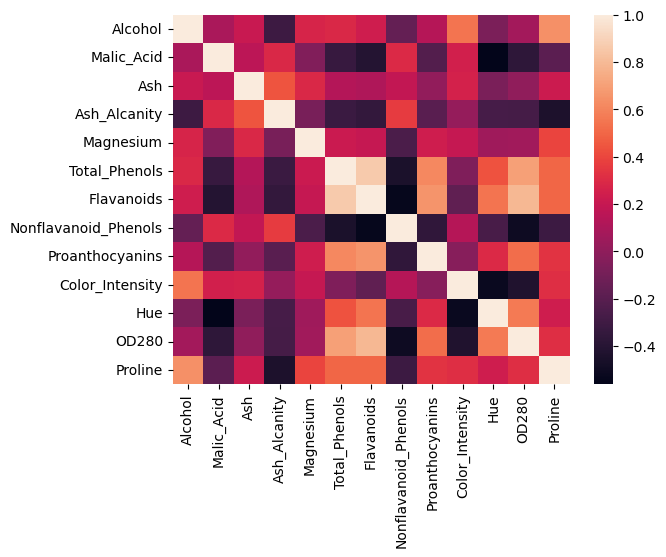

In [5]:
df.corr()
sns.heatmap(df.corr())

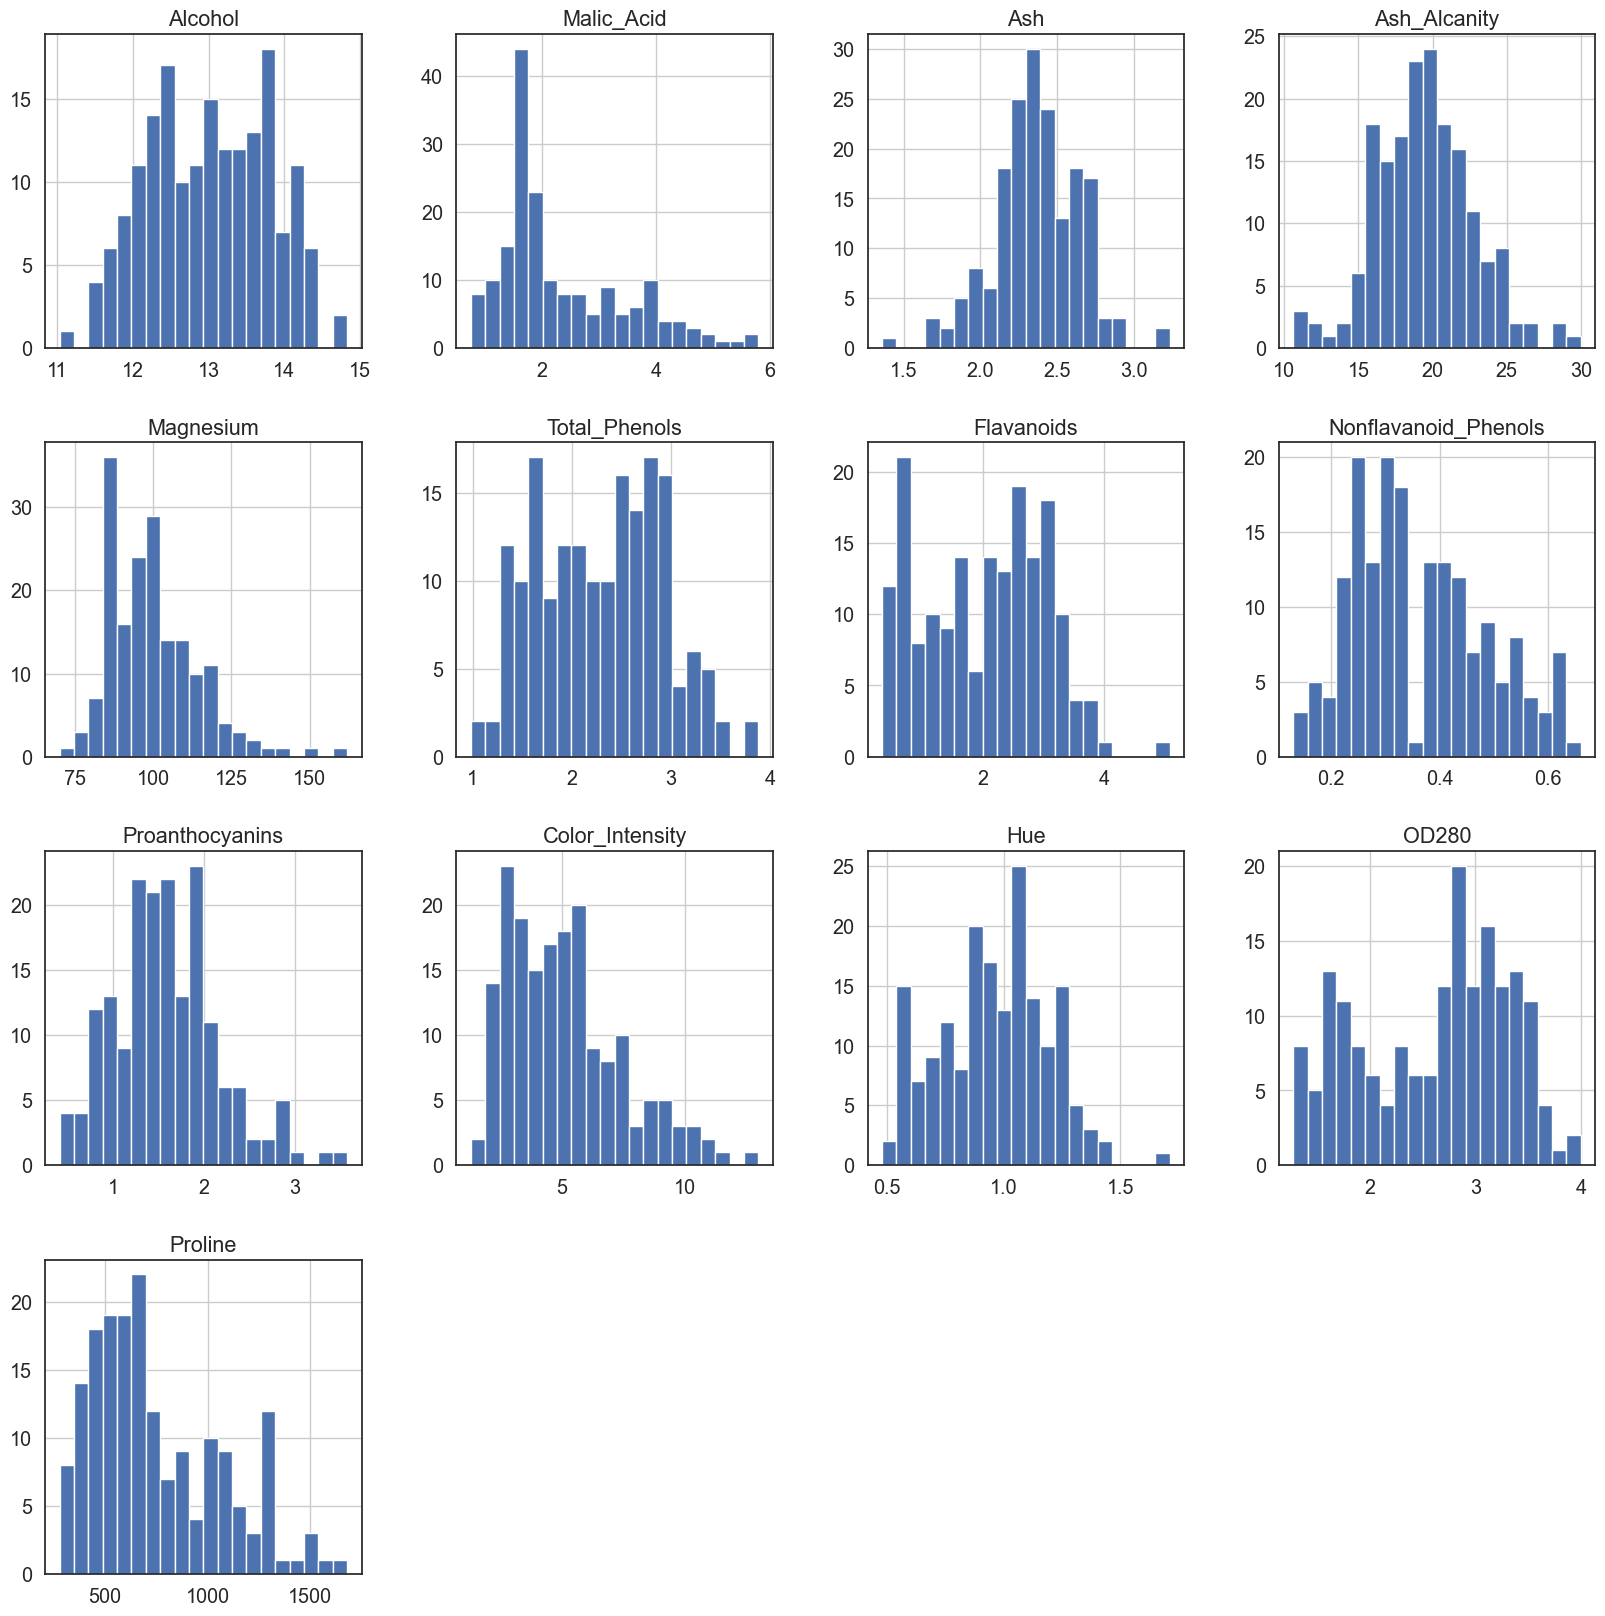

In [6]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20)

# Preprocessing

In [7]:
# This scales each column to have mean=0 and standard deviation=1
SS=StandardScaler()

# Apply scaling
X=pd.DataFrame(SS.fit_transform(df), columns=df.columns)

In [8]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


## PCA 

In [9]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Shape and preview
print(principal_df.shape)
principal_df.head()

(178, 2)


,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


The new columns are called Principal Components (PC's) and give the coordinates of the data in the new smaller space.

Let's plot the PCA in 2D

Text(0, 0.5, 'PC2')

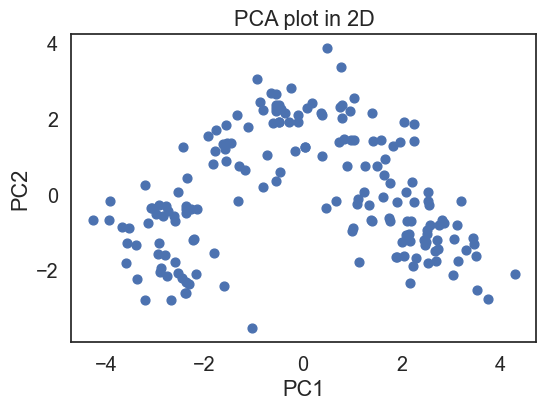

In [10]:
# Figure size
plt.figure(figsize=(6,4))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

- Notice how these points have no colours (yet) because we don't know what their classes are. 
- so we assign colours by clustering the data into groups using techniques such as k-Means.

# k-Means clustering

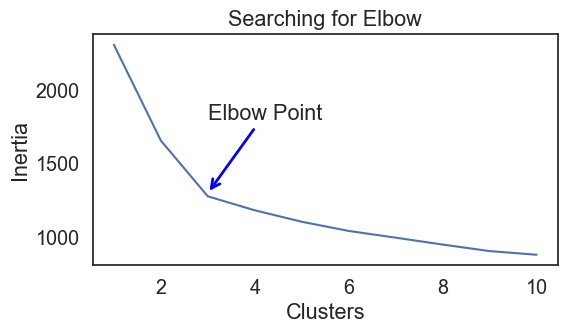

In [11]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(6, 3))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Elbow Point', xy=(3, 1300), xytext=(3, 1800), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [12]:
# KMeans
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

# Train and make predictions
clusters = kmeans.fit_predict(X)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

Text(0, 0.5, 'PC2')

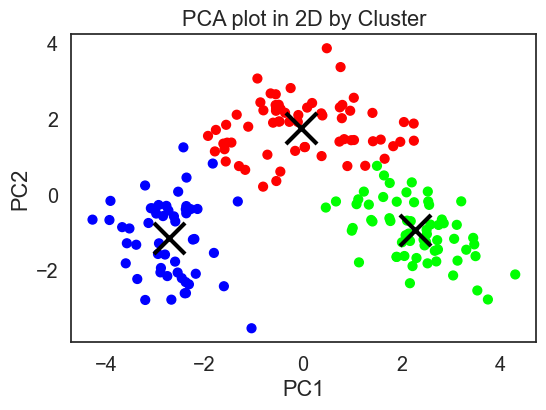

In [13]:
# Figure size
plt.figure(figsize=(6,4))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot in 2D by Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')

# t-SNE

In [14]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(178, 2)


,tsne comp. 1,tsne comp. 2
0,4.781957,13.297017
1,3.026384,9.089474
2,7.334048,10.337535
3,6.803395,13.206506
4,8.480659,6.583901


Text(0, 0.5, 'tsne component 2')

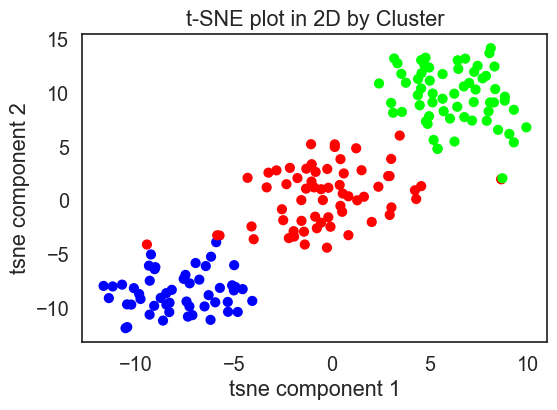

In [15]:
# Figure size
plt.figure(figsize=(6,4))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap="brg", s=40)

# Aesthetics
plt.title('t-SNE plot in 2D by Cluster')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

# UMAP

In [16]:
# UMAP
um = umap.UMAP()
X_fit = um.fit(X)           # we'll use X_fit later
X_umap = um.transform(X)

# Convert to data frame
umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])

# Shape and preview
print(umap_df.shape)
umap_df.head()

(178, 2)


,umap comp. 1,umap comp. 2
0,10.733077,6.457792
1,9.879020,5.462683
2,10.967682,4.987356
3,11.592146,5.984457
4,10.210391,4.078688


In [17]:
import umap.plot

Text(0, 0.5, 'umap component 2')

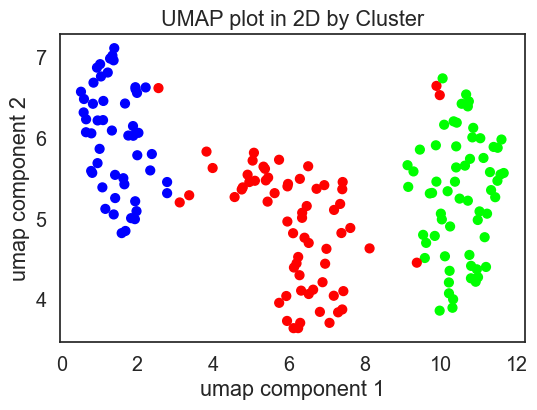

In [18]:
# Figure size
plt.figure(figsize=(6,4))

# Scatterplot
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=clusters, cmap="brg", s=40)

# Aesthetics
plt.title('UMAP plot in 2D by Cluster')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')

# Hierarchical Clustering

Text(0, 0.5, 'PC2')

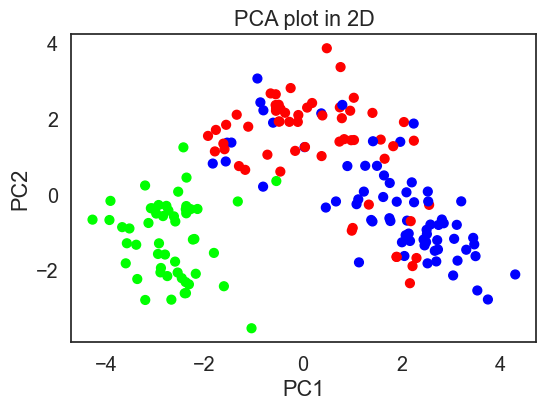

In [19]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=3, linkage='complete').fit_predict(X)
# Figure size
plt.figure(figsize=(6,4))
# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=agglom, cmap="brg", s=40)
# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

# DBSCAN

Text(0, 0.5, 'PC2')

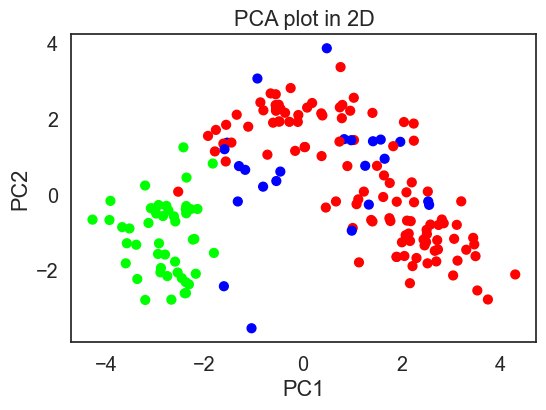

In [20]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=2.8, min_samples=14).fit_predict(X)
# Figure size
plt.figure(figsize=(6,4))
# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=db, cmap="brg", s=40)
# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Model Evaluation

## Dimensionality Reduction 

Text(0, 0.5, 'umap component 2')

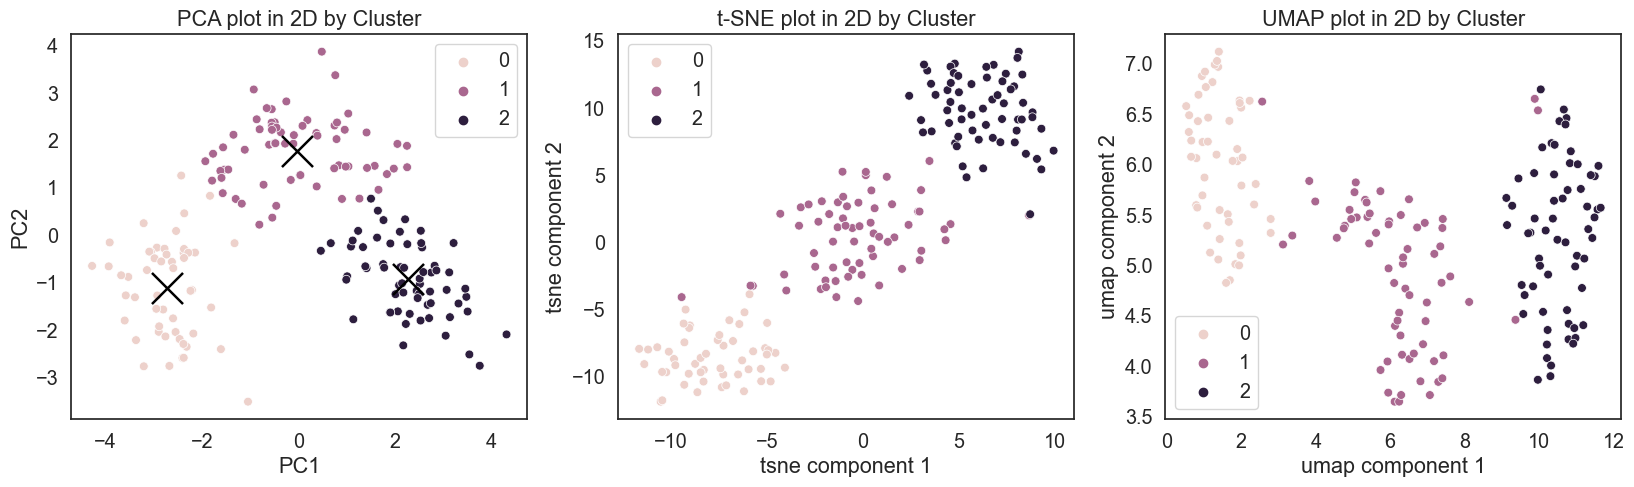

In [21]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(131)
# Scatterplot
sns.scatterplot(x=principal_df.iloc[:,0], y=principal_df.iloc[:,1], hue=clusters, cmap="brg", s=40, ax=ax)
sns.scatterplot(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")
# Aesthetics
ax.set_title('PCA plot in 2D by Cluster')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax = fig.add_subplot(132)
# Scatterplot
sns.scatterplot(x=tsne_df.iloc[:,0], y=tsne_df.iloc[:,1], hue=clusters, cmap="brg", s=40, ax=ax)
# Aesthetics
ax.set_title('t-SNE plot in 2D by Cluster')
ax.set_xlabel('tsne component 1')
ax.set_ylabel('tsne component 2')

ax = fig.add_subplot(133)
# Scatterplot
sns.scatterplot(x=umap_df.iloc[:,0], y=umap_df.iloc[:,1], hue=clusters, cmap="brg", s=40)
# Aesthetics
ax.set_title('UMAP plot in 2D by Cluster')
ax.set_xlabel('umap component 1')
ax.set_ylabel('umap component 2')

PCA seems to be better dimensonality reduction for this dataset, where the t-SNE and UMAP have the considerable outliers.

**Best Performing Dimensonality Reduction Technique: PCA**

## Model 

Text(0, 0.5, 'PCA component 2')

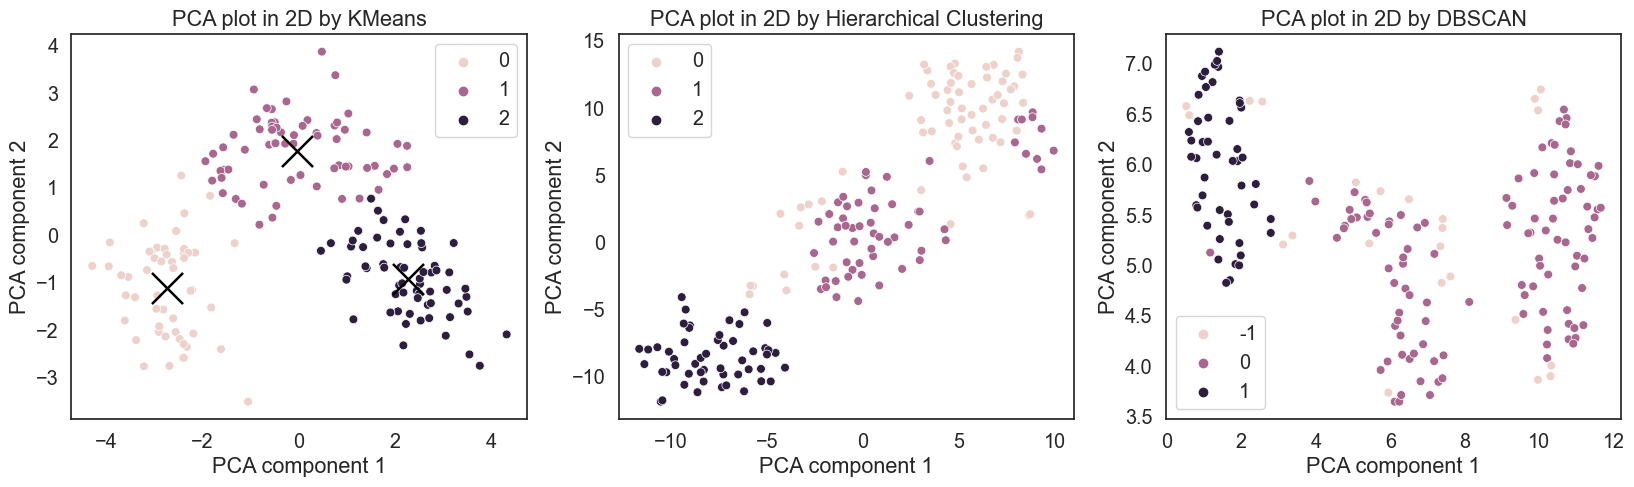

In [22]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(131)
# Scatterplot
sns.scatterplot(x=principal_df.iloc[:,0], y=principal_df.iloc[:,1], hue=clusters, cmap="brg", s=40, ax=ax)
sns.scatterplot(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")
# Aesthetics
ax.set_title('PCA plot in 2D by KMeans')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2')

ax = fig.add_subplot(132)
# Scatterplot
sns.scatterplot(x=tsne_df.iloc[:,0], y=tsne_df.iloc[:,1], hue=agglom, cmap="brg", s=40, ax=ax)
# Aesthetics
ax.set_title('PCA plot in 2D by Hierarchical Clustering')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2')

ax = fig.add_subplot(133)
# Scatterplot
sns.scatterplot(x=umap_df.iloc[:,0], y=umap_df.iloc[:,1], hue=db, cmap="brg", s=40)
# Aesthetics
ax.set_title('PCA plot in 2D by DBSCAN')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2')


From Visually, we can see that DBSCAN and hierarchical clustering has more outliers. KMeans seems to be the better model and let us confirm using the silhouette coefficient metric

In [23]:
from sklearn import metrics
print('Kmeans Score : ',metrics.silhouette_score(X, clusters, metric='euclidean'))
print('Hierarchical Clustering Score : ',metrics.silhouette_score(X, agglom, metric='euclidean'))
print('DBSCAN Score : ',metrics.silhouette_score(X, db, metric='euclidean'))

Kmeans Score :  0.2848589191898987
Hierarchical Clustering Score :  0.20378689690677748
DBSCAN Score :  0.2293698795539214


**Best Performing Model : K-Means**

Thus, the best model for this clustering analysis seems to K-Means and the better dimensionality reduction technique is PCA